# ***Import and download all libraries and dependencies***

In [ ]:
import datetime

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout

# ***Import the required fashion mnist dataset downloaded from moodle***

The dataset fashion mnist contains total 70,000 numeric values which form a image when aligned in a 28 x 28 shape.
- 60,000 are within fashion-mnist_train.csv
- 10,000 are within fashion-mnist_test.csv
- There 784 columns = 28 x 28 shaped


Below we are import the csv's for the dataset which we will be using and converting the int values to float32 datatype

In [ ]:
train_data_path = '/content/fashion-mnist_train.csv'
train_data = pd.read_csv(train_data_path)

test_data_path = '/content/fashion-mnist_test.csv'
test_data = pd.read_csv(test_data_path)

# ***Data Preparation***

**1. Train data preparation**

In [ ]:
train_data_label = train_data['label']
train_data_images = train_data.drop('label', axis=1)
print(train_data_images.iloc[1]['pixel555'])
print(len(train_data['label']))

178
60000


In [ ]:
parent_images_arr = []
child_images_arr = []
count = 1
iteration = 1
for item in range(0,60000) :
  child_child_images_arr = []

  for index in range(1,785) :
    
    if count%28 == 0 :
      child_child_images_arr.append(train_data_images.iloc[item]['pixel'+str(index)])
      child_images_arr.append(child_child_images_arr)
      child_child_images_arr = []
    else :
      child_child_images_arr.append(train_data_images.iloc[item]['pixel'+str(index)])

    count = count +1
  
  parent_images_arr.append(child_images_arr)
  child_images_arr = []
  iteration = iteration +1

len(parent_images_arr)

60000

In [ ]:
final_x_train = np.array(parent_images_arr).reshape(len(parent_images_arr), 28, 28)

y_train_data = []
for item in train_data['label'] :
  y_train_data.append(item)
  
final_y_train = np.array(y_train_data).reshape(len(parent_images_arr))


print(final_x_train.shape)
print(final_y_train.shape)

(60000, 28, 28)
(60000,)


**2. Test data preparation**

In [ ]:
test_data_label = test_data['label']
test_data_images = test_data.drop('label', axis=1)
print(test_data_images.iloc[3]['pixel775'])
print(len(test_data['label']))

137
10000


In [ ]:
test_parent_images_arr = []
test_child_images_arr = []
count = 1
iteration = 1
for item in range(0,10000) :
  test_child_child_images_arr = []

  for index in range(1,785) :
    
    if count%28 == 0 :
      test_child_child_images_arr.append(test_data_images.iloc[item]['pixel'+str(index)])
      test_child_images_arr.append(test_child_child_images_arr)
      test_child_child_images_arr = []
    else :
      test_child_child_images_arr.append(test_data_images.iloc[item]['pixel'+str(index)])

    count = count +1
  
  test_parent_images_arr.append(test_child_images_arr)
  test_child_images_arr = []
  iteration = iteration +1

len(test_parent_images_arr)

10000

In [ ]:
final_x_test = np.array(test_parent_images_arr).reshape(len(test_parent_images_arr), 28, 28)

y_test_data = []
for item in test_data['label'] :
  y_test_data.append(item)

final_y_test = np.array(y_test_data).reshape(len(test_parent_images_arr))

print(final_x_test.shape)
print(final_y_test.shape)

(10000, 28, 28)
(10000,)


# **Final variables with prepared data and shape**

In [ ]:
print(final_x_train.shape, final_y_train.shape)
print(final_x_test.shape, final_y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# ***Plot the images of the labels using imshow method of matplot***

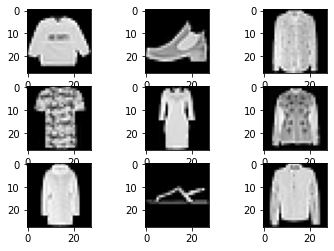

In [ ]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(final_x_train[i], cmap=plt.get_cmap('gray'))
    
plt.show()

# ***Splitting the data for pre training the model and transfer learning***

In [ ]:
pre_train_x_train = []
pre_train_y_train = []
pre_train_x_test = []
pre_train_y_test = []

transfer_learning_x_train = []
transfer_learning_y_train = []
transfer_learning_x_test = []
transfer_learning_y_test = []

for i in range(len(final_x_train)):
    if final_y_train[i] < 5:
        pre_train_x_train.append(final_x_train[i] / 255) # Normalize
        pre_train_y_train.append(final_y_train[i])
    else:
        transfer_learning_x_train.append(final_x_train[i] / 255)
        transfer_learning_y_train.append(final_y_train[i])
        
for i in range(len(final_x_test)):
    if final_y_test[i] < 5:
        pre_train_x_test.append(final_x_test[i] / 255)
        pre_train_y_test.append(final_y_test[i])
    else:
        transfer_learning_x_test.append(final_x_test[i] / 255)
        transfer_learning_y_test.append(final_y_test[i])

# ***Reshaping the data using reshape method into appropriate data shape.***

# Shaping the image in 28 X 28 dimension
- The size of each image in a single-row is 28 X 28. So we convert it to the appropriate input shape of (28, 28, 1). Where the 1 means it is a single channel.

In [ ]:
pre_train_x_train = np.asarray(pre_train_x_train).reshape(-1, 28, 28, 1)
pre_train_x_test = np.asarray(pre_train_x_test).reshape(-1, 28, 28, 1)
pre_train_y_train = np_utils.to_categorical(np.asarray(pre_train_y_train))
pre_train_y_test = np_utils.to_categorical(np.asarray(pre_train_y_test))

transfer_learning_x_train = np.asarray(transfer_learning_x_train).reshape(-1, 28, 28, 1)
transfer_learning_x_test = np.asarray(transfer_learning_x_test).reshape(-1, 28, 28, 1)
transfer_learning_y_train = np_utils.to_categorical(np.asarray(transfer_learning_y_train))
transfer_learning_y_test = np_utils.to_categorical(np.asarray(transfer_learning_y_test))

print("Pre Training [Train and Test data]")
print(pre_train_x_train.shape, pre_train_y_train.shape)
print(pre_train_x_test.shape, pre_train_y_test.shape)

print("\nTransfer Learning [Train and Test data]")
print(transfer_learning_x_train.shape, transfer_learning_y_train.shape)
print(transfer_learning_x_test.shape, transfer_learning_y_test.shape)

Pre Training [Train and Test data]
(30000, 28, 28, 1) (30000, 5)
(5000, 28, 28, 1) (5000, 5)

Transfer Learning [Train and Test data]
(30000, 28, 28, 1) (30000, 10)
(5000, 28, 28, 1) (5000, 10)


# ***Convolution Neural Network using sequential model***
**Layers in Convolutional Neural Network (CNN)**

**We instantiate the Sequentual model and add 
layers to the model using the add()     method**.

**In Sequential model, each layer will have one input tensor and one output tensor.**

We are using the 3 primary layers for CNN in our code below: 
1. Convolutional layer
2. Pooling layer
3. Dense layer (which are fully connected layers)

- The first layer here is the convolution layer (Conv2D). It takes image if the shape (28, 28, 1) as input and will internally extract set of features while maintaining relation between near by pixels.

- The second layer is the Pooling layer (MaxPooling2D). Convolutional layers are always followed by Pooling layers as pairs. MaxPooling2D helps in getting the maximum value where filter is applied and it also removes any noise present by the previous convolutional layer.

- The third layers after convolution and pooling layer pairs is the Flatten layer. The pooled feature contains data in multiple channels which is flattened to a single channel here.

- The final layers is the Dense layer also referred as fully connected layer. Here features are classifed into class labels.


**1. Model initialization and creation**

In [ ]:
convolution_model = Sequential()

# Convolutional and Pooling layers
convolution_model.add(Conv2D(32, 5, input_shape = (28, 28, 1), activation = 'relu'))
convolution_model.add(Conv2D(16, 5, activation = 'relu'))
convolution_model.add(MaxPool2D(pool_size = (2, 2)))
convolution_model.add(Conv2D(8, 3, activation = 'relu'))

# Fattern the data to single channel. 
# Is done between final Pooling Layer and first Dense Layer
convolution_model.add(Flatten())
convolution_model.add(Dropout(0.4))

# Fully connected layers
# 128 units for first Dense layer
convolution_model.add(Dense(128, activation = 'relu'))

# 5 units for second Dense layer
convolution_model.add(Dense(5, activation = 'softmax'))

# Compiling the model and add optimizer and metrics such as accuracy 
# which will help us determine how our model has performed overall.
convolution_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

convolution_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 16)        12816     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 8)           1160      
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                        

**2. Evaluating the model by passing the pre-train data**

In [ ]:
# Finally use the fit() method to train our model.
# Train the model for 10 iterations(epochs).
history_cnn = convolution_model.fit(pre_train_x_train, pre_train_y_train,
         validation_data = (pre_train_x_test, pre_train_y_test),
         epochs = 10,
         shuffle = True,
         batch_size = 100,
         verbose = 2)

Epoch 1/10
300/300 - 74s - loss: 0.1829 - accuracy: 0.9339 - val_loss: 0.1637 - val_accuracy: 0.9430 - 74s/epoch - 248ms/step
Epoch 2/10
300/300 - 78s - loss: 0.1771 - accuracy: 0.9346 - val_loss: 0.1577 - val_accuracy: 0.9426 - 78s/epoch - 258ms/step
Epoch 3/10
300/300 - 72s - loss: 0.1723 - accuracy: 0.9363 - val_loss: 0.1555 - val_accuracy: 0.9438 - 72s/epoch - 238ms/step
Epoch 4/10
300/300 - 74s - loss: 0.1659 - accuracy: 0.9391 - val_loss: 0.1531 - val_accuracy: 0.9436 - 74s/epoch - 246ms/step
Epoch 5/10
300/300 - 72s - loss: 0.1653 - accuracy: 0.9390 - val_loss: 0.1502 - val_accuracy: 0.9450 - 72s/epoch - 239ms/step
Epoch 6/10
300/300 - 73s - loss: 0.1570 - accuracy: 0.9426 - val_loss: 0.1528 - val_accuracy: 0.9432 - 73s/epoch - 244ms/step
Epoch 7/10
300/300 - 72s - loss: 0.1545 - accuracy: 0.9421 - val_loss: 0.1544 - val_accuracy: 0.9434 - 72s/epoch - 239ms/step
Epoch 8/10
300/300 - 73s - loss: 0.1503 - accuracy: 0.9436 - val_loss: 0.1476 - val_accuracy: 0.9466 - 73s/epoch - 243

**3. Making convolutional layers untrainable**

In [ ]:
convolution_model.layers

# ***Transfer Learning***

**Applying Transfer Learning using the pretrained model on the test data.**

In [ ]:
for layer in convolution_model.layers[:6]:
    layer.trainable = False
    
for layer in convolution_model.layers:
    print(layer.trainable)

False
False
False
False
False
False
True
True


**1. Model initialization and creation by passing the existing convolution model.**

In [ ]:
transfer_learning_model = Sequential(convolution_model.layers[:6])

transfer_learning_model.add(Dense(128, activation = 'relu'))
transfer_learning_model.add(Dense(10, activation = 'softmax'))

transfer_learning_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

transfer_learning_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 16)        12816     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 8)           1160      
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                      

**2. Evaluating the model by passing the test data.**

In [ ]:
history = transfer_learning_model.fit(transfer_learning_x_train, transfer_learning_y_train,
            validation_data = (transfer_learning_x_test, transfer_learning_y_test),
            epochs = 10,
            shuffle = True,
            batch_size = 100,
            verbose = 2)

Epoch 1/10
300/300 - 16s - loss: 0.3065 - accuracy: 0.8997 - val_loss: 0.1586 - val_accuracy: 0.9410 - 16s/epoch - 54ms/step
Epoch 2/10
300/300 - 16s - loss: 0.1830 - accuracy: 0.9357 - val_loss: 0.1478 - val_accuracy: 0.9402 - 16s/epoch - 54ms/step
Epoch 3/10
300/300 - 15s - loss: 0.1644 - accuracy: 0.9414 - val_loss: 0.1287 - val_accuracy: 0.9536 - 15s/epoch - 49ms/step
Epoch 4/10
300/300 - 15s - loss: 0.1532 - accuracy: 0.9448 - val_loss: 0.1253 - val_accuracy: 0.9528 - 15s/epoch - 49ms/step
Epoch 5/10
300/300 - 15s - loss: 0.1449 - accuracy: 0.9486 - val_loss: 0.1280 - val_accuracy: 0.9526 - 15s/epoch - 49ms/step
Epoch 6/10
300/300 - 15s - loss: 0.1359 - accuracy: 0.9524 - val_loss: 0.1177 - val_accuracy: 0.9546 - 15s/epoch - 49ms/step
Epoch 7/10
300/300 - 15s - loss: 0.1311 - accuracy: 0.9528 - val_loss: 0.1121 - val_accuracy: 0.9580 - 15s/epoch - 49ms/step
Epoch 8/10
300/300 - 15s - loss: 0.1241 - accuracy: 0.9551 - val_loss: 0.1032 - val_accuracy: 0.9626 - 15s/epoch - 49ms/step


# ***Comparing the results***


**Transfer Learning:**
- loss: 0.1181
- accuracy: 0.9563 

**Convolutional Neural Network:**
- loss: 0.1410 
- accuracy: 0.9477


**Plotting the Loss and the Accuracy metrics**
- The loss gradually decreases and the accuracy gradually increases after each iteration(epochs).

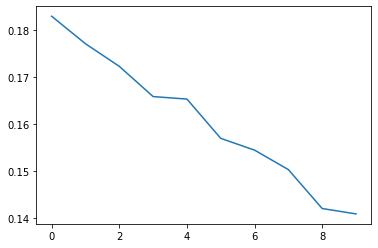

In [ ]:
plt.plot(history_cnn.history['loss'])

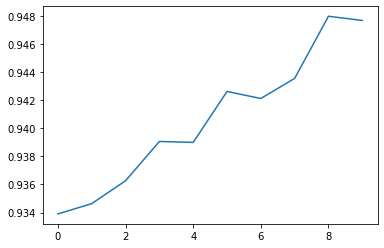

In [ ]:
plt.plot(history_cnn.history['accuracy'])

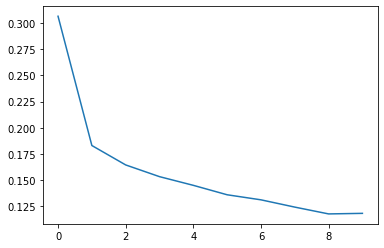

In [ ]:
plt.plot(history.history['loss'])

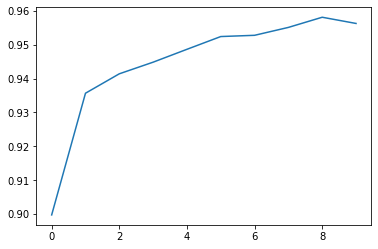

In [ ]:
plt.plot(history.history['accuracy'])